# Analyze unit info df: SbCs

## TODO

## Setup

### Start DJD
Run main.py as interactive (-i) module (-m) and remotely (-r)\
NOTE: any code inside the DJD-executing cell other than the executing line is not allowed

In [2]:
run -im djd.main -- --dbname=dj_hmov --user=write

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_hmov' as 'write@10.153.173.165'


In [3]:
import matplotlib.pyplot as plt

from djd import hmov_models
from djd import hmov_unit
from l6s import l6s_utils # Layer 6 suppression code repo with utility functions for plotting unit overview

# This import does not seem to work - WHY? works for other DJD modules and functions - circular import?
# from djd.hmov_unit import get_tranges_hmov, _get_xptranges  

Importing l6s package.


In [4]:
%load_ext autoreload
%autoreload 2

## Get unit info df

In [5]:
# Get unit info df
unit_info = l6s_utils.get_combined_unit_info(load_df_name='unit_info_20210129')
unit_info

get_combined_unit_info(): Getting combined unit info.
  Loading previous mseu df file:
   /Users/ybauer/GDrive/BBE_BusseBerensEuler/projects/ct-fb_L6_suppression/analyses/L6_suppression/l6s/unit_crit_and_type_info/data/unit_info_20210129.csv


,m,s,e,u,s_region,e_name,OSI_ctrl,OSI_opto,DSI_ctrl,DSI_opto,...,tun_rsq_opto,c_zscore,fr_mean,fr_ctrl,fr_opto,fr_spon_ctrl,fr_spon_opto,OMI,SNR_opto,SNR_ctrl
0,Ntsr1Cre_2019_0002,3,1,13,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ntsr1Cre_2019_0002,3,1,14,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ntsr1Cre_2019_0002,3,1,19,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ntsr1Cre_2019_0002,3,1,30,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ntsr1Cre_2019_0002,3,1,40,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676,Ntsr1Cre_2020_0003,2,17,140,V1,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,NaN,NaN,0.421520,0.840047,0.002993,NaN,NaN,-0.992899,NaN,NaN
2677,Ntsr1Cre_2020_0003,2,17,141,V1,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,NaN,NaN,2.764570,2.854360,2.674780,NaN,NaN,-0.032479,NaN,NaN
2678,Ntsr1Cre_2020_0003,2,17,142,V1,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,NaN,NaN,7.063575,5.776570,8.350580,NaN,NaN,0.182203,NaN,NaN
2679,Ntsr1Cre_2020_0003,2,17,144,V1,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,NaN,NaN,3.044920,3.047910,3.041930,NaN,NaN,-0.000982,NaN,NaN


## Check SbC wave shapes and autocorrellograms

In [6]:
unit_info.keys()

Index(['m', 's', 'e', 'u', 's_region', 'e_name', 'OSI_ctrl', 'OSI_opto', 'DSI_ctrl', 'DSI_opto', 'sbc_zscore', 'sbc_method', 'sbc', 'chirp_type', 'wave_type', 'burst_ratio_ctrl', 'burst_ratio_opto',
       'tun_model', 'tun_rsq_ctrl', 'tun_rsq_opto', 'c_zscore', 'fr_mean', 'fr_ctrl', 'fr_opto', 'fr_spon_ctrl', 'fr_spon_opto', 'OMI', 'SNR_opto', 'SNR_ctrl'],
      dtype='object')

In [11]:
# Check how many experiments identified SbCs (includes duplicate expts per unit!)
print(f'SbC proportion estimate: {len(unit_info[unit_info.sbc==True])}/{(len(unit_info[unit_info.sbc==True]) + len(unit_info[unit_info.sbc==False]))}',
      f'({np.round(len(unit_info[unit_info.sbc==True]) / (len(unit_info[unit_info.sbc==True]) + len(unit_info[unit_info.sbc==False])), 3)*100} %)')

SbC proportion estimate: 91/577 (15.8 %)


In [13]:
df = unit_info[unit_info['e_name']=='conTun12_opto']

In [14]:
df = df[df['sbc_zscore'].notna()]

In [15]:
df.sort_values('sbc_zscore')['sbc_zscore']

1153   -16.461134
1388   -15.609023
1384   -13.587777
1918   -12.278066
1390    -9.579733
          ...    
1149     8.243193
24       8.678365
1263     9.364481
1385    12.283168
1152    15.153172
Name: sbc_zscore, Length: 186, dtype: float64

{'m': 'Ntsr1Cre_2020_0001', 's': 3, 'e': 5, 'u': 14, 'sbc_zscore': -16.461133583333336}
{'m': 'Ntsr1Cre_2020_0001', 's': 4, 'e': 5, 'u': 19, 'sbc_zscore': -15.609023074999998}
{'m': 'Ntsr1Cre_2020_0001', 's': 4, 'e': 5, 'u': 7, 'sbc_zscore': -13.587776999999999}
{'m': 'Ntsr1Cre_2020_0002', 's': 5, 'e': 5, 'u': 22, 'sbc_zscore': -12.278066433333334}
{'m': 'Ntsr1Cre_2020_0001', 's': 4, 'e': 5, 'u': 25, 'sbc_zscore': -9.579732666666667}
{'m': 'Ntsr1Cre_2020_0001', 's': 2, 'e': 6, 'u': 58, 'sbc_zscore': -7.206975833333333}
{'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 5, 'u': 23, 'sbc_zscore': -6.386582}
{'m': 'Ntsr1Cre_2020_0001', 's': 3, 'e': 12, 'u': 14, 'sbc_zscore': -5.326042083333333}
{'m': 'Ntsr1Cre_2020_0001', 's': 4, 'e': 5, 'u': 30, 'sbc_zscore': -5.253093416666666}
{'m': 'Ntsr1Cre_2020_0001', 's': 3, 'e': 5, 'u': 21, 'sbc_zscore': -5.163338833333333}


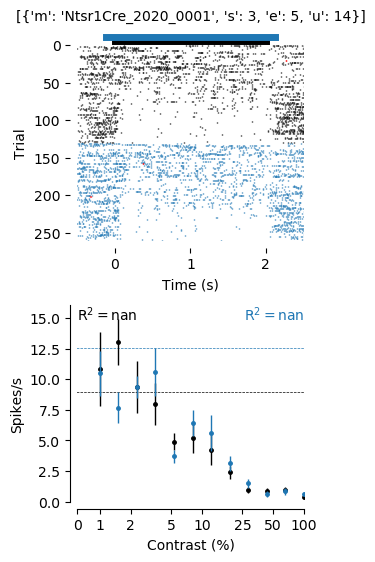

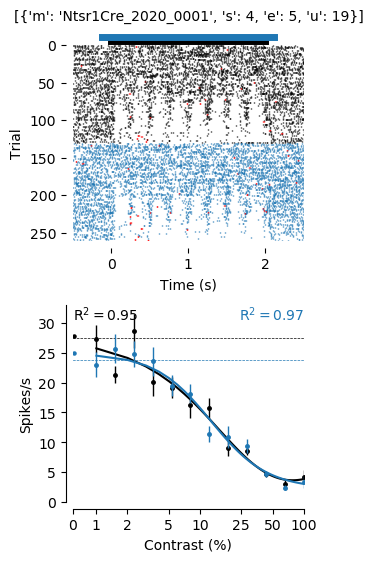

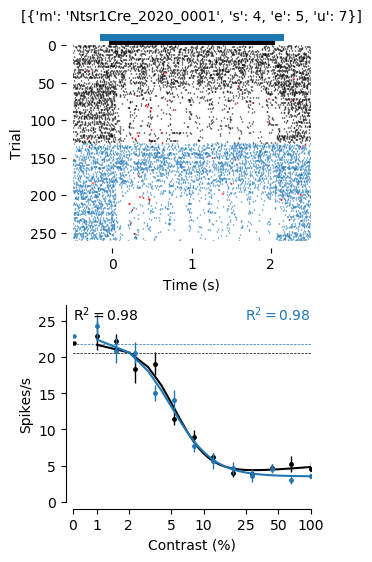

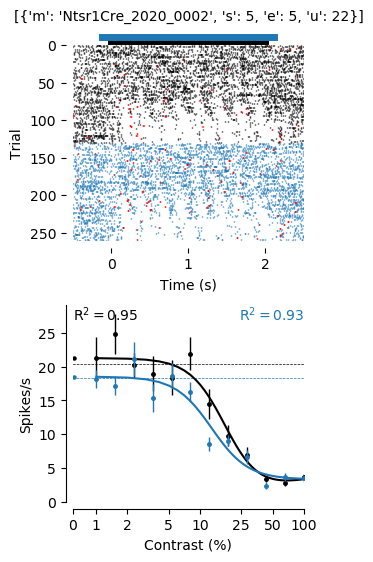

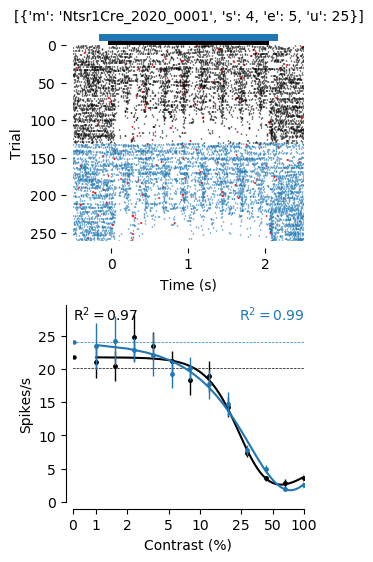

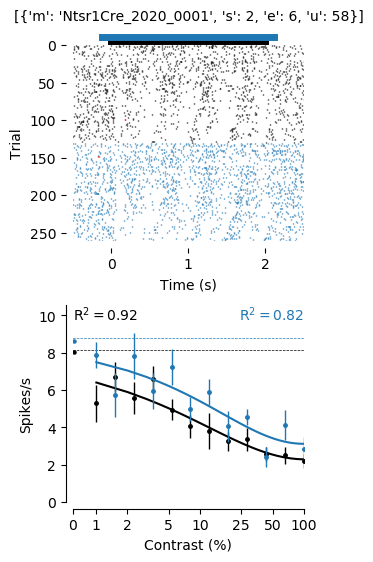

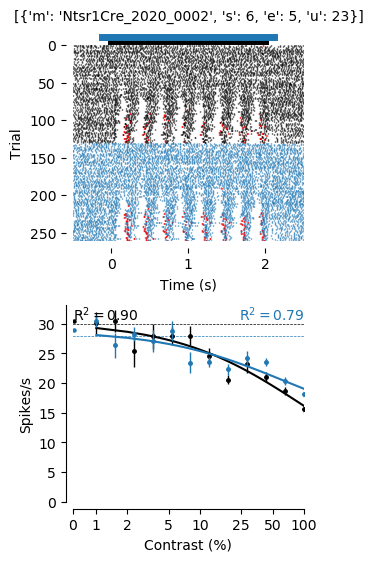

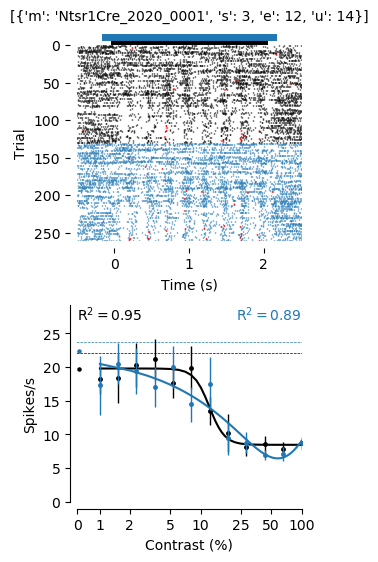

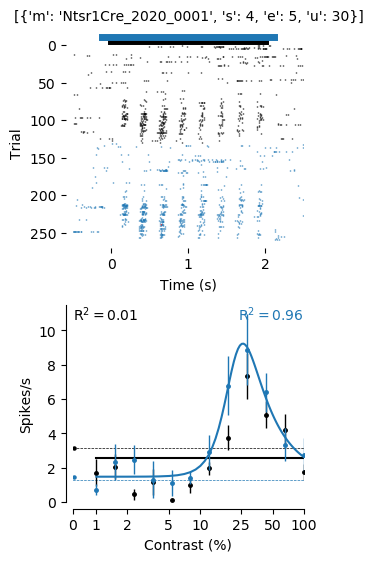

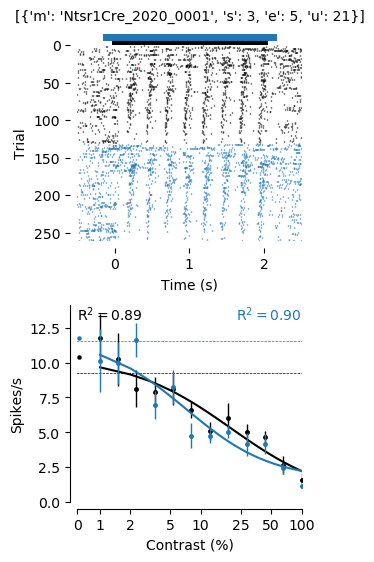

In [16]:
for i, row in df.sort_values('sbc_zscore', ascending=True).head(n=10).iterrows():
    ukey = row.to_dict()
#     print(ukey)
    ukey = {key: value for key, value in ukey.items() if key in ['m','s','e','u','sbc_zscore']}
    print(ukey)
    l6s_utils.plot_ori_con_raster_tun(ukey, stim='conTun')
#     plt.show()

In [17]:
df = unit_info[unit_info['e_name']=='oriTun12_opto']

In [18]:
df = df[df['sbc_zscore'].notna()]

In [19]:
df.sort_values('sbc_zscore')['sbc_zscore']

1367   -73.667050
1374   -38.723217
1363   -36.148400
1369   -32.913058
1888   -31.836300
          ...    
1368    10.717633
1380    14.422797
1376    15.536825
1364    18.824075
1365    24.465408
Name: sbc_zscore, Length: 220, dtype: float64

{'m': 'Ntsr1Cre_2020_0001', 's': 4, 'e': 4, 'u': 19, 'sbc_zscore': -73.66704999999997}
{'m': 'Ntsr1Cre_2020_0001', 's': 4, 'e': 4, 'u': 34, 'sbc_zscore': -38.723216666666666}
{'m': 'Ntsr1Cre_2020_0001', 's': 4, 'e': 4, 'u': 7, 'sbc_zscore': -36.14840000000001}
{'m': 'Ntsr1Cre_2020_0001', 's': 4, 'e': 4, 'u': 25, 'sbc_zscore': -32.91305833333333}
{'m': 'Ntsr1Cre_2020_0002', 's': 5, 'e': 3, 'u': 22, 'sbc_zscore': -31.836300000000005}
{'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 4, 'u': 17, 'sbc_zscore': -23.413757500000006}
{'m': 'Ntsr1Cre_2020_0002', 's': 3, 'e': 4, 'u': 1, 'sbc_zscore': -23.1319675}
{'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 4, 'u': 11, 'sbc_zscore': -21.098717500000006}
{'m': 'Ntsr1Cre_2020_0001', 's': 3, 'e': 11, 'u': 27, 'sbc_zscore': -19.999336666666668}
{'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 5, 'u': 96, 'sbc_zscore': -19.674426968730835}


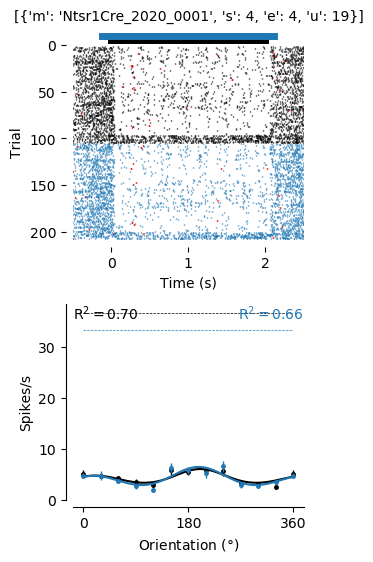

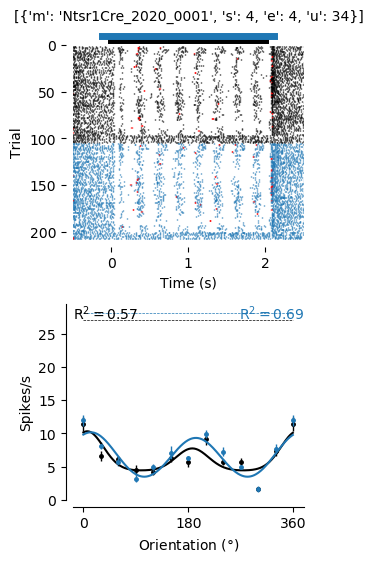

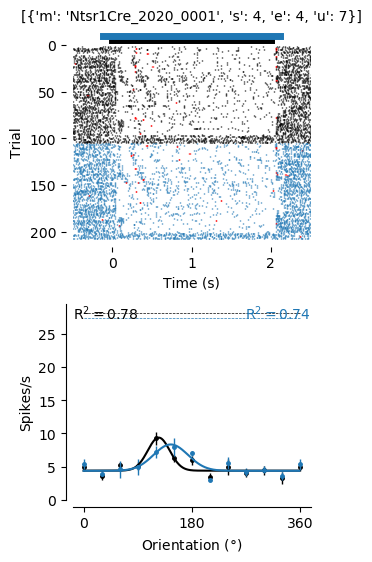

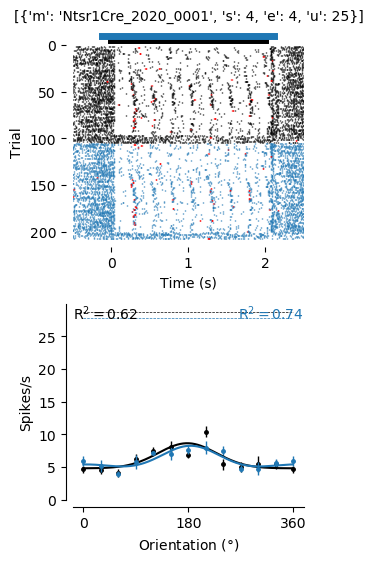

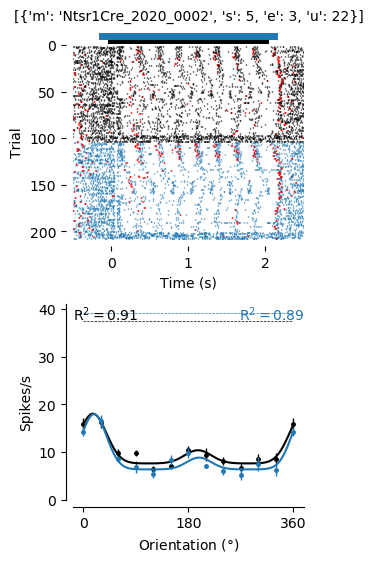

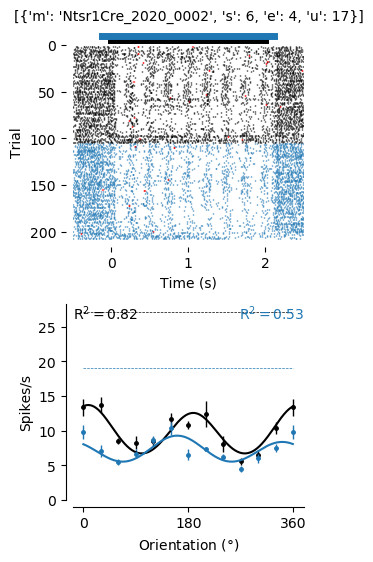

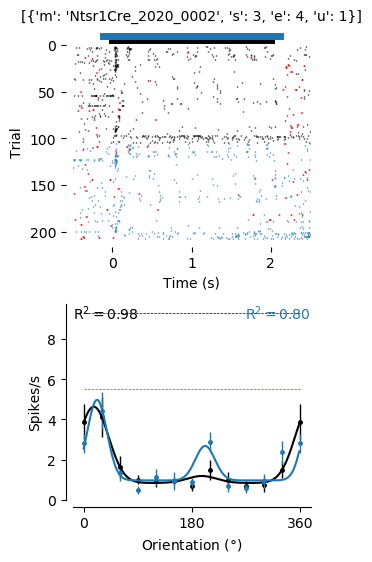

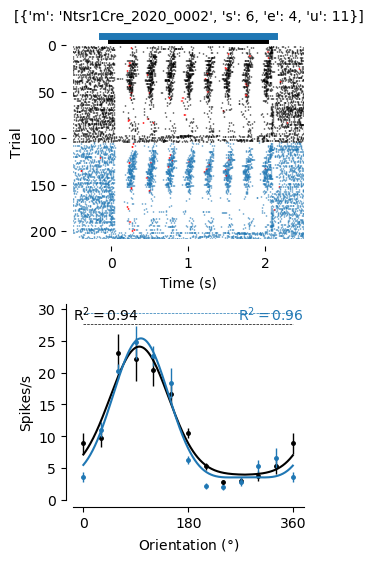

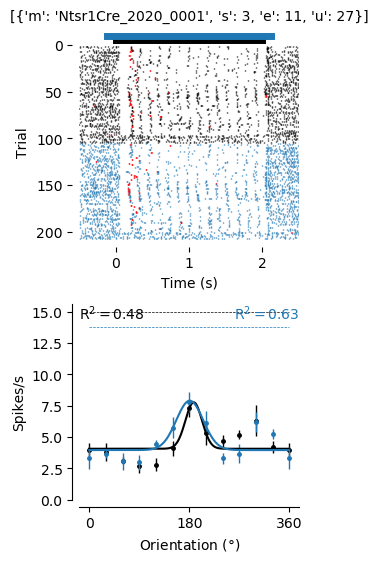

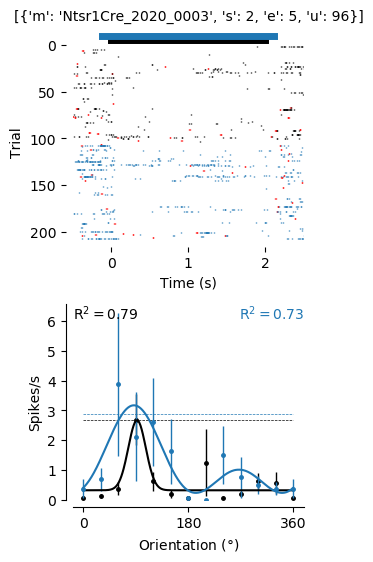

In [20]:
for i, row in df.sort_values('sbc_zscore', ascending=True).head(n=10).iterrows():
    ukey = row.to_dict()
#     print(ukey)
    ukey = {key: value for key, value in ukey.items() if key in ['m','s','e','u','sbc_zscore']}
    print(ukey)
    l6s_utils.plot_ori_con_raster_tun(ukey, stim='oriTun')
#     plt.show()

{'m': 'Ntsr1Cre_2020_0001', 's': 4, 'e': 4, 'u': 15, 'sbc_zscore': 24.46540833333333}
{'m': 'Ntsr1Cre_2020_0001', 's': 4, 'e': 4, 'u': 12, 'sbc_zscore': 18.824075000000004}
{'m': 'Ntsr1Cre_2020_0001', 's': 4, 'e': 4, 'u': 39, 'sbc_zscore': 15.536825}
{'m': 'Ntsr1Cre_2020_0001', 's': 4, 'e': 4, 'u': 46, 'sbc_zscore': 14.4227975}
{'m': 'Ntsr1Cre_2020_0001', 's': 4, 'e': 4, 'u': 22, 'sbc_zscore': 10.7176325}


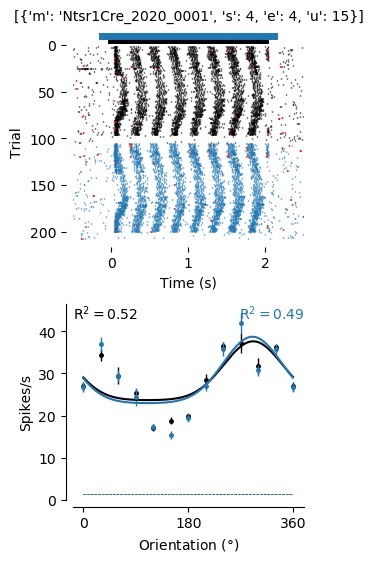

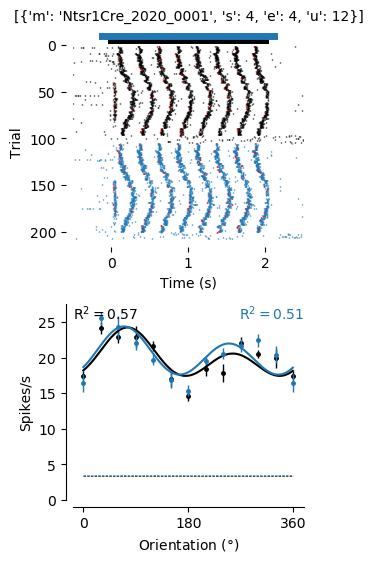

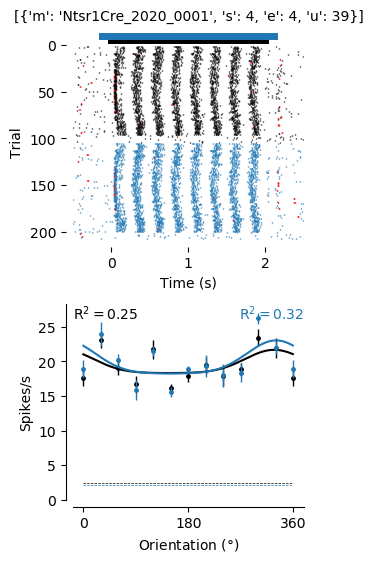

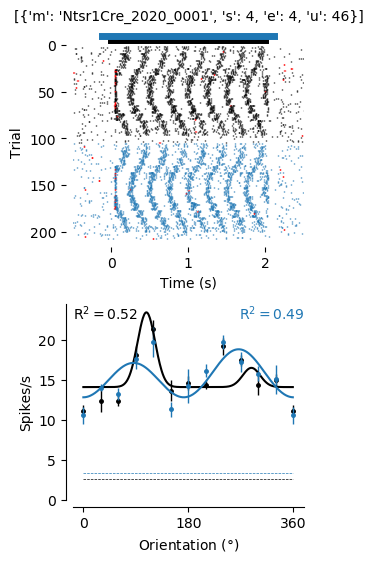

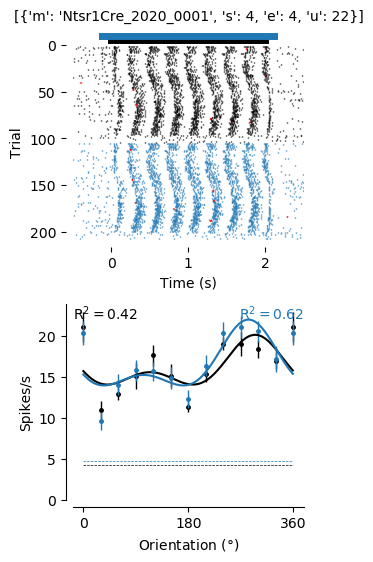

In [21]:
for i, row in df.sort_values('sbc_zscore', ascending=False).head(n=5).iterrows():
    ukey = row.to_dict()
#     print(ukey)
    ukey = {key: value for key, value in ukey.items() if key in ['m','s','e','u','sbc_zscore']}
    print(ukey)
    l6s_utils.plot_ori_con_raster_tun(ukey, stim='oriTun')
#     plt.show()

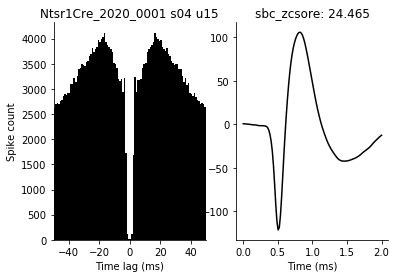

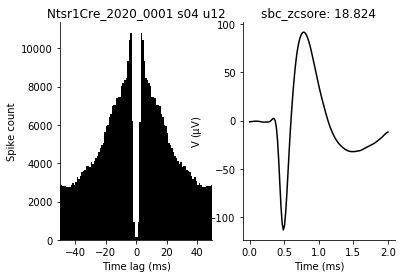

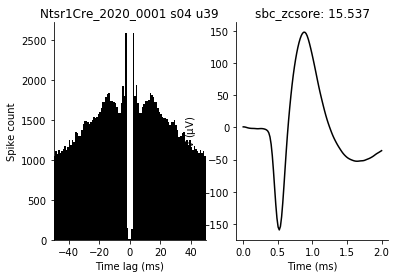

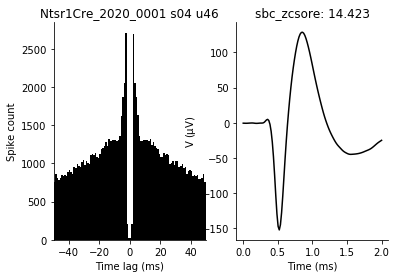

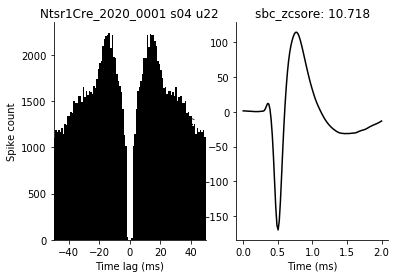

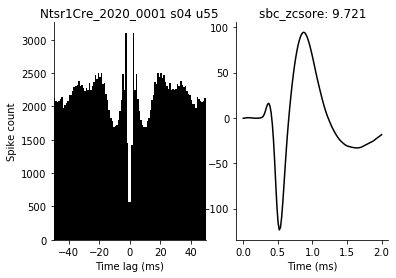

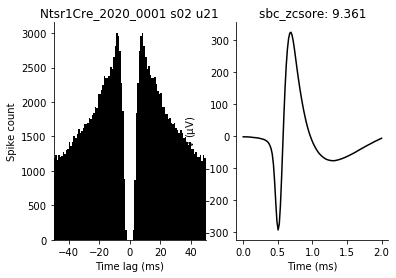

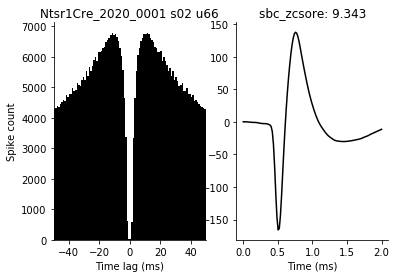

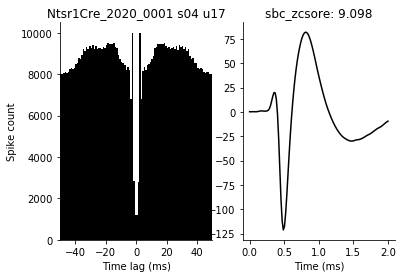

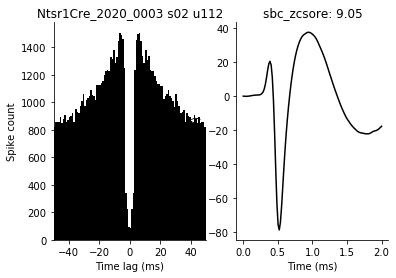

In [22]:
for i, row in df.sort_values('sbc_zscore', ascending=False).head(n=10).iterrows():
    ukey = row.to_dict()
    fig, axs = plt.subplots(1,2)
    (Unit.Properties() & ukey).acorr(ax=axs[0])
    (Unit.Properties() & ukey).plot_wave(ax=axs[1], title=False)
    axs[1].set_title(f'sbc_zcsore: {np.round(ukey["sbc_zscore"], 3)}')
    plt.show()

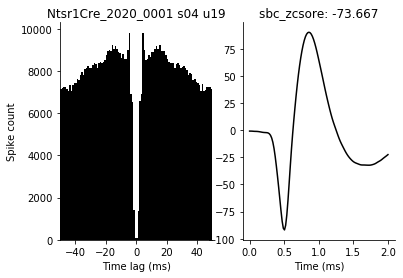

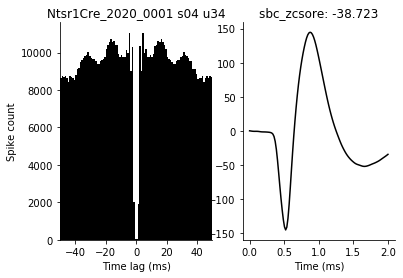

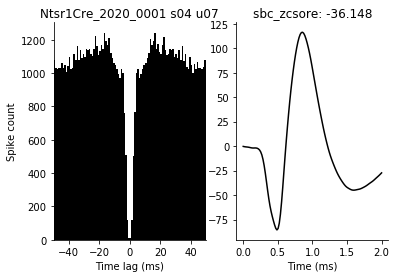

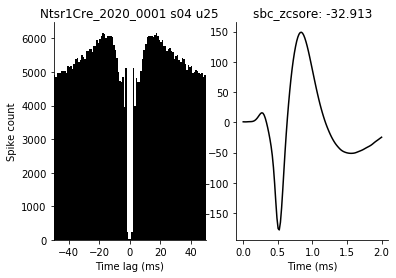

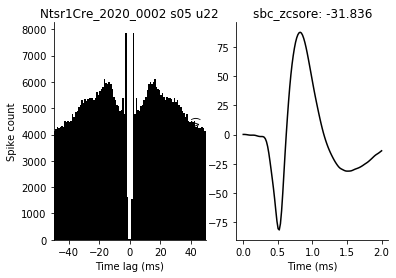

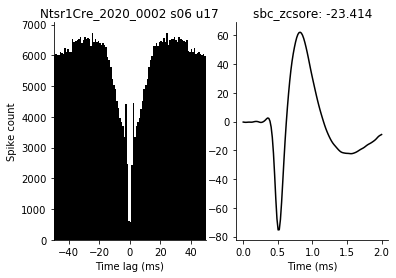

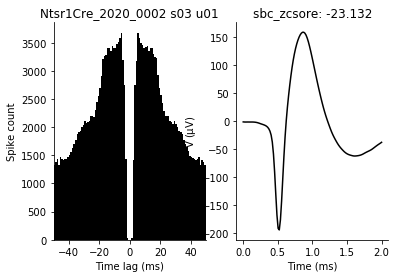

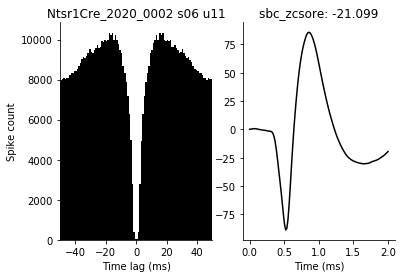

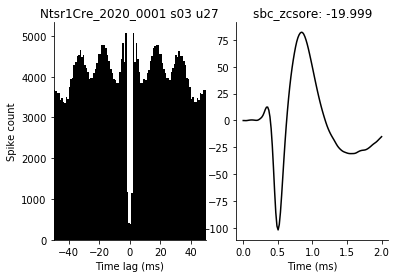

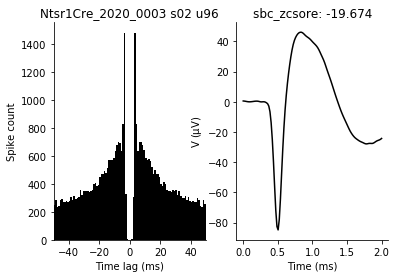

In [23]:
for i, row in df.sort_values('sbc_zscore', ascending=True).head(n=10).iterrows():
    ukey = row.to_dict()
    fig, axs = plt.subplots(1,2)
    (Unit.Properties() & ukey).acorr(ax=axs[0])
    (Unit.Properties() & ukey).plot_wave(ax=axs[1], title=False)
    axs[1].set_title(f'sbc_zcsore: {np.round(ukey["sbc_zscore"], 3)}')
    plt.show()

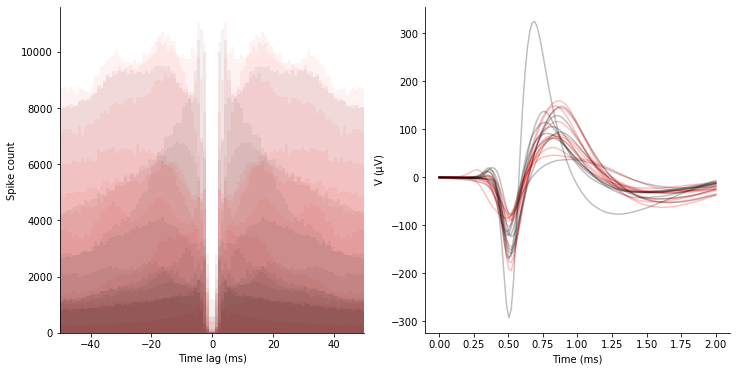

In [24]:
sbcs = df.sort_values('sbc_zscore', ascending=True).head(n=10)[['m','s','e','u']]
non_sbcs = df.sort_values('sbc_zscore', ascending=False).head(n=10)[['m','s','e','u']]

fig, axs = plt.subplots(1,2, figsize=(12,6))

(Unit.Properties() & sbcs).acorr(ax=axs[0], color='r', alpha=0.05, title=False);
(Unit.Properties() & non_sbcs).acorr(ax=axs[0], color='k', alpha=0.05, title=False);

(Unit.Properties() & sbcs).plot_wave(ax=axs[1], color='r', alpha=0.25, title=False);
(Unit.Properties() & non_sbcs).plot_wave(ax=axs[1], color='k', alpha=0.25, title=False);

Text(0.5, 1.0, 'non-SbC (top 10 by zscore)')

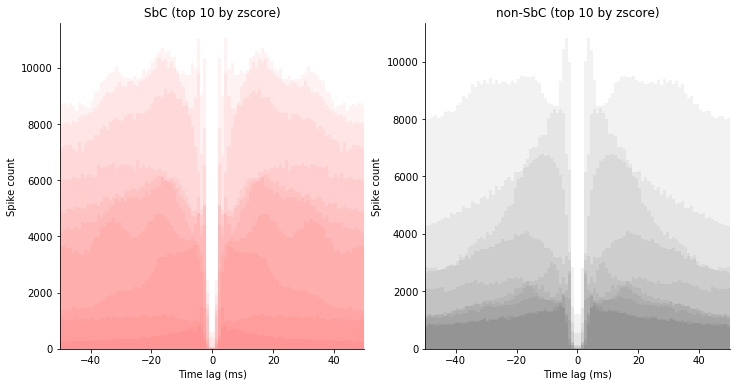

In [25]:
sbcs = df.sort_values('sbc_zscore', ascending=True).head(n=10)[['m','s','e','u']]
non_sbcs = df.sort_values('sbc_zscore', ascending=False).head(n=10)[['m','s','e','u']]

fig, axs = plt.subplots(1,2, figsize=(12,6))

(Unit.Properties() & sbcs).acorr(ax=axs[0], color='r', alpha=0.05, title=False);
(Unit.Properties() & non_sbcs).acorr(ax=axs[1], color='k', alpha=0.05, title=False);
axs[0].set_title('SbC (top 10 by zscore)')
axs[1].set_title('non-SbC (top 10 by zscore)')

Text(0.5, 1.0, 'non-SbC (top 20 by zscore)')

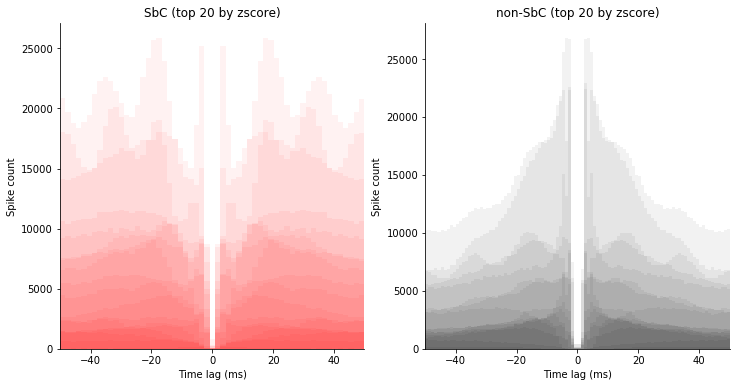

In [23]:
sbcs = df.sort_values('sbc_zscore', ascending=True).head(n=20)[['m','s','e','u']]
non_sbcs = df.sort_values('sbc_zscore', ascending=False).head(n=20)[['m','s','e','u']]

fig, axs = plt.subplots(1,2, figsize=(12,6))

(Unit.Properties() & sbcs).acorr(ax=axs[0], color='r', alpha=0.05, title=False);
(Unit.Properties() & non_sbcs).acorr(ax=axs[1], color='k', alpha=0.05, title=False);
axs[0].set_title('SbC (top 20 by zscore)')
axs[1].set_title('non-SbC (top 20 by zscore)')

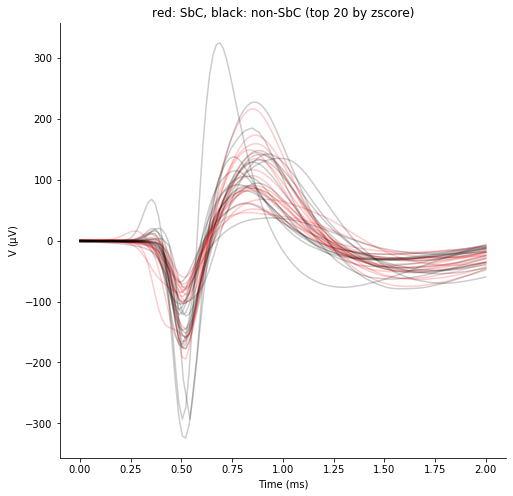

In [26]:
sbcs = df.sort_values('sbc_zscore', ascending=True).head(n=20)[['m','s','e','u']]
non_sbcs = df.sort_values('sbc_zscore', ascending=False).head(n=20)[['m','s','e','u']]

fig, axs = plt.subplots(1, figsize=(8,8))

(Unit.Properties() & sbcs).plot_wave(ax=axs, color='r', alpha=0.2, title=False);
(Unit.Properties() & non_sbcs).plot_wave(ax=axs, color='k', alpha=0.2, title=False);
axs.set_title('red: SbC, black: non-SbC (top 20 by zscore)');